<a href="https://colab.research.google.com/github/Muhirwakyeyune/Unsupervised_learning_projects/blob/main/solomon_K_fold_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***             CROSS VALIDATION TECHNIQUES***

         DEF: cross. validation techniques is a techniques used in machine learning to evaluate the performance predictive model on a dataset
 the model divide the dataset into two set
 1. Training set
 2. Validation set
                 **WHY DO WE NEED CROSS VALIDATION ** 

              1. Evaluate model performance
              2. Avoid overfitting
              3. Hyperparameter tuning
              4. Limited data
                           

here in this Implementation we have added codes to help us understand, K-fold cross validation for model selection , Cross validation Techniques can help us to determine which machine learning models is efficient for deployment.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=data.drop(['Outcome'], axis=1)
y=data['Outcome']

In [ ]:
X=np.array(X)
y=np.array(y)
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
def split_data(x,y):
  n=int(len(x)*0.8)
  X_train, X_test=x[:n], x[n:]
  y_train, y_test=y[:n], y[n:]
  return X_train, X_test, y_train, y_test 


In [ ]:
X_train, X_test, y_train, y_test =split_data(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
def normalize(data):
  mean=np.mean(data)
  std=np.std(data)
  x_normalized=(data-mean)/std
  return x_normalized

In [ ]:
X_train=normalize(X_train)

X_train
X_test=normalize(X_test)
X_test


array([[-0.6014273 ,  1.62675228,  0.50389013, ..., -0.1610548 ,
        -0.78464682,  0.08281682],
       [-0.74178507,  1.0653212 ,  0.46880069, ..., -0.34176543,
        -0.79078747, -0.32071176],
       [-0.6891509 ,  1.25831313,  0.88987399, ..., -0.29088574,
        -0.79166471, -0.2680776 ],
       ...,
       [-0.70669563,  1.32849202,  0.46880069, ..., -0.33474754,
        -0.79012077, -0.2680776 ],
       [-0.77687451,  1.41621562,  0.25826403, ..., -0.26632313,
        -0.78829612,  0.03018266],
       [-0.77687451,  0.83723983,  0.43371124, ..., -0.26105971,
        -0.78889264, -0.39089065]])

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Define a class for logistic regression
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    # Add an intercept column to the input data
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
        
    # Compute the sigmoid function of the input
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    # Compute the loss function of the model
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        
    # Fit the model to the input data
    def fit(self, X, y):
        # Add an intercept column to the input data
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # Initialize the model parameters to zero
        self.theta = np.zeros(X.shape[1])
        
        # Iterate over the training data and update the parameters using gradient descent
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
    
    # Predict the probabilities of the input data
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        return self.sigmoid(np.dot(X, self.theta))
    
    # Predict the labels of the input data
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold


# Define a class for K-nearest neighbors (KNN)
class KNN:
    def __init__(self, k=5):
        self.k = k
    
    # Compute the Euclidean distance between two points
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    # Fit the model to the training data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # Predict the labels of the input data
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred[i] = most_common_label
        return y_pred


# Define a function for k-fold cross-validation
def k_fold(X, y, k, model):
    # Compute the size of each fold
    fold_size = len(X) // k
    
    # Initialize an empty list to hold the scores for each fold
    scores = []
    
    # Iterate over each fold
    for i in range(k):
        # Compute the indices of the validation data for this fold
        start = i * fold_size
        end = (i + 1) * fold_size
                # Extract the validation data
        X_val = X[start:end]
        y_val = y[start:end]
        
        # Extract the training data
        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])
        
        # Fit the model to the training data
        model.fit(X_train, y_train)
        
        # Predict the labels of the validation data
        y_pred = model.predict(X_val)
        
        # Compute the accuracy of the model on the validation data
        score = accuracy_score(y_val, y_pred)
        
        # Append the score to the list of scores
        scores.append(score)
    
    # Compute the average score across all folds
    avg_score = sum(scores) / len(scores)
    
    return avg_score
# Generate synthetic data
#X, y = make_classification(n_samples=10000, n_features=3, n_informative=2, n_redundant=1, n_repeated=0, n_classes=2, random_state=42)

# Set up k-fold cross-validation with 5 folds
k = 5

# Create instances of logistic regression and KNN models
lr = LogisticRegression()
knn = KNN()

# Compute accuracy of logistic regression
lr_acc = k_fold(X, y, k, lr)
print("Logistic Regression Accuracy:", lr_acc)

# Compute accuracy of KNN
knn_acc = k_fold(X, y, k, knn)
print("KNN Accuracy:", knn_acc)

 

Logistic Regression Accuracy: 0.550326797385621
KNN Accuracy: 0.7202614379084966


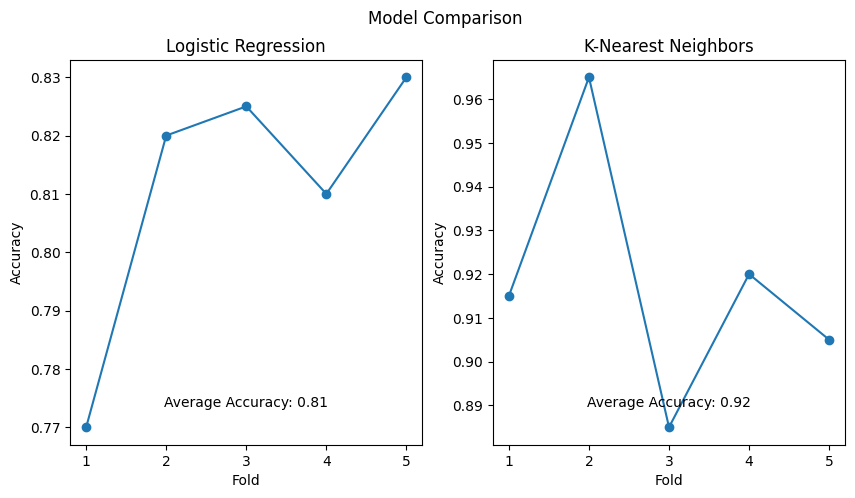

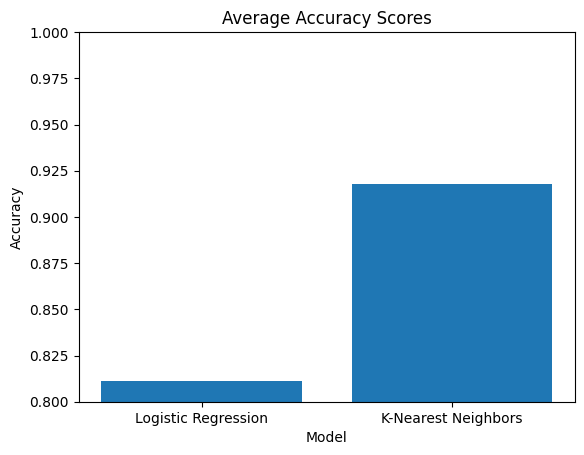

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Generate random dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Define models to compare
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Define number of folds for k-fold cross-validation
num_folds = 5

# Define figure size for subplots
fig_size = (10, 5)

# Define subplot layout
subplot_layout = (1, len(models))

# Initialize figure and subplots
fig, axs = plt.subplots(nrows=subplot_layout[0], ncols=subplot_layout[1], figsize=fig_size)

# Set figure title
fig.suptitle('Model Comparison')

# Initialize list to store accuracy scores for each model
accuracy_scores = []

# Iterate over models and train/test using k-fold cross-validation
for i, (name, model) in enumerate(models):
    # Initialize list to store accuracy scores for each fold
    fold_accuracy_scores = []
    
    # Initialize k-fold cross-validation object
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Iterate over each fold
    for fold_num, (train_index, test_index) in enumerate(kf.split(X)):
        # Split data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit model on training data
        model.fit(X_train, y_train)
        
        # Make predictions on testing data
        y_pred = model.predict(X_test)
        
        # Compute accuracy score and append to list
        fold_accuracy_scores.append(accuracy_score(y_test, y_pred))
        
    # Compute average accuracy across all folds and append to list
    avg_accuracy = np.mean(fold_accuracy_scores)
    accuracy_scores.append(avg_accuracy)
    
    # Plot accuracy scores for each fold
    axs[i].plot(range(1, num_folds+1), fold_accuracy_scores, '-o')
    
    # Set subplot title and labels
    axs[i].set_title(name)
    axs[i].set_xlabel('Fold')
    axs[i].set_ylabel('Accuracy')
    
    # Display average accuracy score for model
    axs[i].text(0.5, 0.1, f'Average Accuracy: {avg_accuracy:.2f}', transform=axs[i].transAxes, ha='center')
    
# Display overall accuracy scores for each model
plt.figure()
plt.bar([name for name, _ in models], accuracy_scores)
plt.title('Average Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()
